# Chapter 3 - 벡터 응용: 데이터 분석에서의 벡터

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

## 상관관계 연습 문제

### 3-1. 두 벡터를 입력으로 받아 두 개의 수를 출력하는 파이썬 함수 작성
- 두 개의 수 : 피어슨 상관계수, 코사인 유사도

In [2]:
def pearson_cosine(vec1, vec2):
    # 피어슨 상관계수를 구하기 위해 각 변수를 평균 중심화한다
    vec1_mc = vec1 - np.mean(vec1)
    vec2_mc = vec2 - np.mean(vec2)
    mean_centering = np.dot(vec1_mc, vec2_mc)
    
    # pearson 상관계수 구하기
    # 벡터 노름 곱으로 내적을 나눈 것이 분모
    pearson = mean_centering / (np.linalg.norm(vec1_mc) * np.linalg.norm(vec2_mc))

    # cosine 유사도를 구하기 위해, 분자 (내적) 구하기
    dot = np.dot(vec1, vec2)
    # cosine 유사도 구하기
    cosine_similarity = dot / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

    # print("pearson 상관 계수:", pearson)
    # print("cosine 유사도:", cosine_similarity)

    return pearson, cosine_similarity


In [3]:
vec1 = np.array([3, 8, 10, 12])
vec2 = np.array([1, 3, 9, 14])

In [4]:
pearson_cosine(vec1, vec2)

(0.90921338405622, 0.9448748306973088)

In [5]:
# np.corrcoef로 구한 피어슨 상관계수와 함수로 만든 상관계수 비교
np.corrcoef(vec1, vec2)[0, 1]

0.9092133840562201

In [6]:
# scipy의 코사인 유사도와 비교
# scipy의 cosine 함수는 코사인 유사도가 아니라 거리를 계산하기 때문에, 1에서 거리를 빼줘야 유사도를 구할 수 있다
# 거리 (distance) : 유사도와 대비되는 개념
# 거리가 가깝다 = 유사도가 높다 / 거리가 멀다 = 유사도가 낮다
# https://abluesnake.tistory.com/100
1 - cosine(vec1, vec2)

0.9448748306973088

### 3-2. 상관관계와 코사인 유사도 차이 살펴보기

In [7]:
a = np.array([0, 1, 2, 3])
a-50

array([-50, -49, -48, -47])

In [8]:
var1 = np.array([0, 1, 2, 3])

def diff_pearson_cosine(var1):

    offsets = range(-50, 51)

    # 각 offset 마다 구하는 pearson 상관 계수와 cosine 유사도를 담을 빈 리스트 생성
    pearsons = []
    cosines = []

    for offset in offsets:
        var2 = var1 + offset
        
        # 연습문제 3-1에서 사용한 pearson_cosine 함수 활용
        pearson, cosine = pearson_cosine(var1, var2)

        pearsons.append(pearson)
        cosines.append(cosine)
        
    # pearson 함수를 통해 구한 피어슨 상관계수, 코사인 유사도 시각화
    plt.figure(figsize=(8, 5))
    plt.plot(offsets, pearsons, marker="o", color="k", label="피어슨")
    plt.plot(offsets, cosines, marker="s", color="r", label="코사인 유사도")

    plt.xlabel("평균 오프셋")
    plt.ylabel("r 또는 c")
    plt.grid()
    
    # 범례 추가
    plt.legend()

    plt.show()

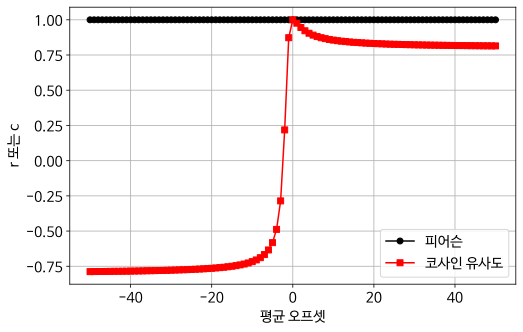

In [9]:
diff_pearson_cosine(var1)

## 필터링과 특징 탐지 연습 문제

### 3-4. 에지 검출기 만들기

In [10]:
# kernel 생성
kernel = np.array([-1, 1])
kernel

array([-1,  1])

In [11]:
# 시계열 신호 그리기
def timeseries_signal(time):
    # 이후에도 signals 변수 사용하기 위해, 전역 변수로 선언
    global signals
    # signals = []
    signals = np.zeros(shape=time)
    timeseries = range(time)
    for i in timeseries:
        if i >= 10 and i < 20:
            # signals.append(1 * 1)
            signals[i] = 1 * 1
        else:
            # signals.append(1 * (-1))
            signals[i] = 1 * (-1)
    plt.figure(figsize=(6, 4))
    plt.plot(timeseries, signals, marker="o", color="k")
    plt.title("시계열 신호")
    plt.tight_layout()
    plt.show()

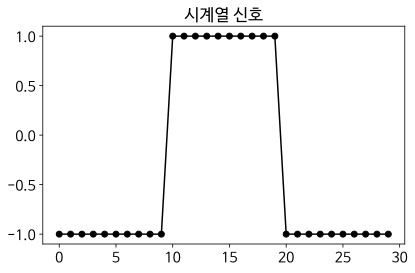

In [12]:
# 0 ~ 30까지 시계열 신호 출력
timeseries_signal(30)

In [33]:
def edge_detection(time, kernel):
    length = len(kernel)
    # edges = []
    edges = np.zeros(shape=time)
    
    # range를 통해 time을 시계열로 만든다
    timeseries = range(time)
    
    # for t in timeseries_edge:
    for t in timeseries:
        # IndexError를 방지하기 위해, 
        # time에서 kernel의 길이를 뺀 것보다 t가 크다면 내적 값을 0으로 넣는다
        # t가 0인 경우, t-1을 계산할 수 없기 때문에 내적 값을 0으로 넣는다
        # (kernel의 길이만큼 비교할 시계열 데이터 조각이 없기 때문)
        if t < 1 or t > time-length:
            dot = 0
        # kernel의 길이만큼 시계열 데이터 조각을 앞뒤로 잘라와서 내적 값을 구한다
        else:
            dot = np.dot(kernel, signals[t-1:(t+length-1)])
        # 왜 책에는 1로 만들어라고 하는지는 모르겠지만, 정규화 느낌이라 length로 나누었음
        # edges.append(dot/length)
        edges[t] = dot/length
    
    # 위에서 만든 시계열 신호와 다르게, signals도 0 ~ 1 사이 범위로 책에서 시각화 했다
    # 책에서 시각화한 것처럼 바꿔준다 (np.where 사용)
    plt.plot(timeseries, np.where(signals<0, 0, signals), marker="o", color="k", label="신호")
    plt.plot(timeseries, edges, marker="*", color="r", label="에지 검출")

    plt.grid()
    # 범례 사용
    plt.legend()

    plt.show()

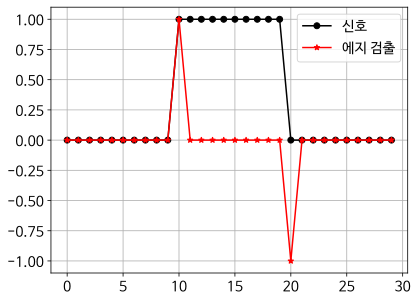

In [34]:
edge_detection(30, kernel)

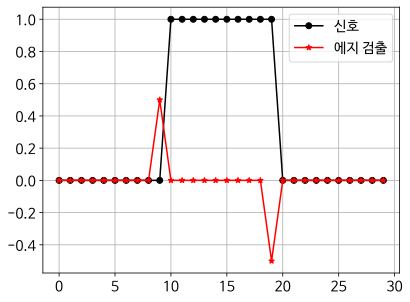

In [35]:
# kernel을 np.array([0, -1, 1, 0])로 변경
kernel2 = np.array([0, -1, 1, 0])
edge_detection(30, kernel2)

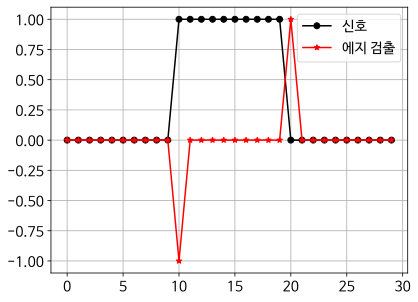

In [36]:
# kernel을 np.array([1, -1])로 변경
kernel3 = np.array([1, -1])
edge_detection(30, kernel3)

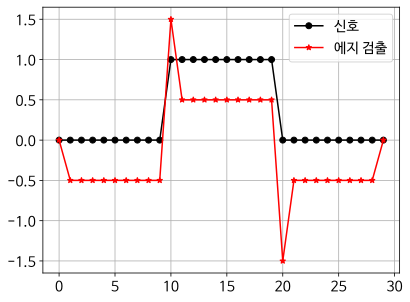

In [37]:
# kernel을 비대칭 np.array([-1, 2])로 변경
kernel4 = np.array([-1, 2])
edge_detection(30, kernel4)